In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Exercise 3.1

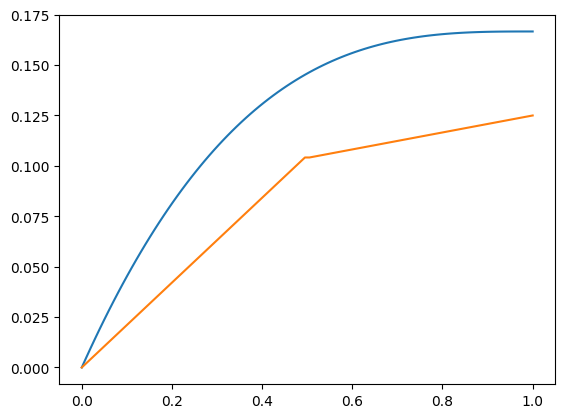

In [62]:
x = np.linspace(0,1,100)
x1 = np.linspace(0,0.5,50)
x2 = np.linspace(0.5,1,50)
z = np.zeros(50)
y = x*(x**2-3*x+3)/6


#N = [[1-x1,z],[2*x1,(2-2*x2)],[z,2*x2-1]]
Ns = [np.concatenate((1-x1,z), axis=0),np.concatenate((2*x1,(2-2*x2)), axis=0),np.concatenate((z,2*x2-1), axis=0)]
k = np.matrix([[-2,2,0],[2,0,2],[0,-2,2]])
f = np.array([5/24,1/4,1/24])
phi = np.linalg.solve(k,f)

phiT = np.zeros(100)

for i,v in enumerate(Ns):
    phiT += phi[i]*v


plt.plot(x,y)
plt.plot(x,phiT)
plt.show()


# Exercise 3.2

In [141]:
import scipy as sp

def N(A,x):
    ans=[]
    for X in x:
        if x[A-1]<=X<=x[A]:
            ans.append((X-x[A-1])/(dx))
        elif x[A]<=X<=x[A+1]:
            ans.append((x[A+1]-X)/(dx))
        else:
            ans.append(0)
    return np.array(ans) 

def dN(x,A):
    ans=[]
    for X in x:
        if x[A-1]<=X<=x[A]:
            ans.append(-1/(dx))
        elif x[A]<=X<=x[A+1]:
            ans.append(1/(dx))
        else:
            ans.append(0)
    return np.array(ans) 

def S(x):
    return 1-x

def stiffness(Ne):
    return 1/dx*np.array([[1,-1],[-1,1]])
    # K = np.zeros((Ne, Ne))
    # for A in range(Ne):
    #     for B in range(Ne):
    #         K[A,B]=(-1)**(A+B)/dx
    # return K

def force(A):
    return (dx/3)*np.array([1,2])
    # return (sp.integrate.quad(SbyN,0,1,args=(A)))[0]

def SbyN(x,A):
    return S(x)*N(A,[x])
    


In [148]:
alpha=.1
beta=-.2

Ne = 100
# nodes = np.array([0, *sorted(np.random.rand(Ne-1)), 1])
nodes=np.linspace(0,1,Ne+1)
dx=nodes[1]-nodes[0]

LM = np.zeros((2, Ne), dtype=np.int64)
for e in range(Ne):
    if e==0:
        LM[0, e] = -1
        LM[1, e] = 0
    else:
        LM[0, e] = LM[1, e-1]
        LM[1, e] = LM[0, e] + 1
K = np.zeros((Ne, Ne))
F = np.zeros((Ne,))
for e in range(Ne):
    k_e = stiffness(nodes[e:e+2])
    # k_e=stiffness(Ne)
    
    for a in range(2):
        f_e = force(A)
        A = LM[a, e]
        for b in range(2):
            B = LM[b, e]
            if (A >= 0) and (B >= 0):
                K[A, B] += k_e[a, b]
        if (A >= 0):
            F[A] += f_e[a]
    # Modify force vector for Dirichlet BC
    if e == 0:
        F[0] -= alpha * k_e[1, 0]
# Modify force vector for Neumann BC
F[-1] += beta
# Solve
Psi_A = np.zeros_like(nodes)
Psi_A[0] = alpha
Psi_A[1:] = np.linalg.solve(K, F)

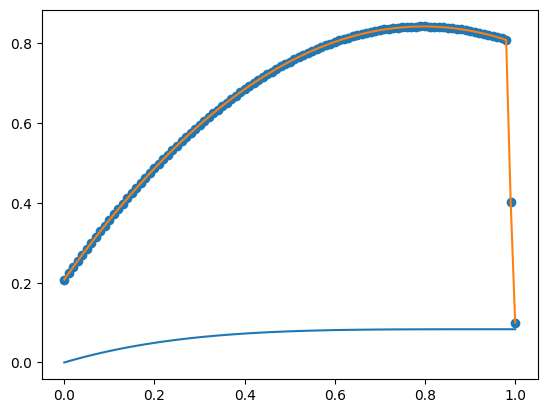

In [149]:
x_ana=np.linspace(0,1,100)
y_ana=x_ana*(4-6*x_ana+4*x_ana**2-x_ana**3)/12

phiT = np.zeros(len(nodes))

for e in range(Ne):
    for a in range(2):
        A = LM[a, e]
        phiT += Psi_A[e]*N(A,nodes)

plt.plot(x_ana,y_ana)
plt.plot(nodes,phiT)
plt.scatter(nodes,phiT)
plt.show()

In [ ]:
sp.integrate.quad(SbyN,0,1,args=(1))

IndexError: list index out of range

In [129]:
F

array([ 1.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
        0.1       ,  0.1       ,  0.1       ,  0.1       , -0.13333333])